# 0. Working with national test data

### a

In [64]:
import pandas as pd

df_engleska = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name="Engelska")
df_engleska = df_engleska.tail(4).reset_index().drop(columns="index")
df_engleska

df_matematik = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name="Matematik")
df_matematik = df_matematik.tail(4).reset_index().drop(columns="index")
df_matematik

df_svenska = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name="Svenska")
df_svenska = df_svenska.tail(4).reset_index().drop(columns="index")
df_svenska




,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100,100,100,15,15.9,14.2


In [63]:
#Bättre aleternativ för att få ut alla Sheets och sen få ut bara Engelska. 
# df_dict = {}
# for subject in ["Engelska","Matematik", "Svenska", "Svenska som andraspråk","Rapportbeskrivning och def."]:
#     df_dict[subject] = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name=subject, skiprows=8)
# df_dict["Engelska"]

ValueError: Worksheet named 'Rapportbeskrivning och def' not found

### b

In [41]:
df_engleska.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [65]:
df_engelska_cleaned = df_engleska.rename(
    {'Unnamed: 0' : 'Plats', 'Unnamed: 1':'Huvudman', 'Unnamed: 2': 'Totalt (A-F)', 'Unnamed: 3': 'Flickor (A-F)', 'Unnamed: 4': 'Pojkar (A-F)',
       'Unnamed: 5': 'Totalt (A-E)', 'Unnamed: 6': 'Flickor (A-E)', 'Unnamed: 7': 'Pojlkar (A-E)', 'Unnamed: 8': 'Totalt (poäng)', 'Unnamed: 9': 'Flickor (poäng)',
       'Unnamed: 10': 'Pojkar (poäng)'}, axis=1
)

df_matematik_cleaned = df_matematik.rename(
    {'Unnamed: 0' : 'Plats', 'Unnamed: 1':'Huvudman', 'Unnamed: 2': 'Totalt (A-F)', 'Unnamed: 3': 'Flickor (A-F)', 'Unnamed: 4': 'Pojkar (A-F)',
       'Unnamed: 5': 'Totalt (A-E)', 'Unnamed: 6': 'Flickor (A-E)', 'Unnamed: 7': 'Pojlkar (A-E)', 'Unnamed: 8': 'Totalt (poäng)', 'Unnamed: 9': 'Flickor (poäng)',
       'Unnamed: 10': 'Pojkar (poäng)'}, axis=1
)

df_svenska_cleaned = df_svenska.rename(
    {'Unnamed: 0' : 'Plats', 'Unnamed: 1':'Huvudman', 'Unnamed: 2': 'Totalt (A-F)', 'Unnamed: 3': 'Flickor (A-F)', 'Unnamed: 4': 'Pojkar (A-F)',
       'Unnamed: 5': 'Totalt (A-E)', 'Unnamed: 6': 'Flickor (A-E)', 'Unnamed: 7': 'Pojlkar (A-E)', 'Unnamed: 8': 'Totalt (poäng)', 'Unnamed: 9': 'Flickor (poäng)',
       'Unnamed: 10': 'Pojkar (poäng)'}, axis=1
)

### c

In [69]:
df_engelska_cleaned.head()

df_engelska_cleaned.value_counts()

df_engelska_cleaned.columns

df_engelska_cleaned.describe()

df_matematik_cleaned
df_svenska_cleaned
df_engelska_cleaned

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojlkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97,97.1,97,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17,16.8
3,Riket,Skolverket,49,24,25,100,100,100,18.5,18.9,18.2


### d

In [60]:
df_engelska_cleaned["Totalt (A-F)"] = df_engelska_cleaned["Totalt (A-F)"].astype(int)
df_engelska_cleaned["Totalt (A-E)"] = df_engelska_cleaned["Totalt (A-E)"].astype(float)

df_enkelska_f = (df_engelska_cleaned["Totalt (A-F)"]) * (1-(df_engelska_cleaned["Totalt (A-E)"])/100)

df_enkelska_f

0    3208.23
1    3372.40
2     451.64
3       0.00
dtype: float64

### e

<Axes: >

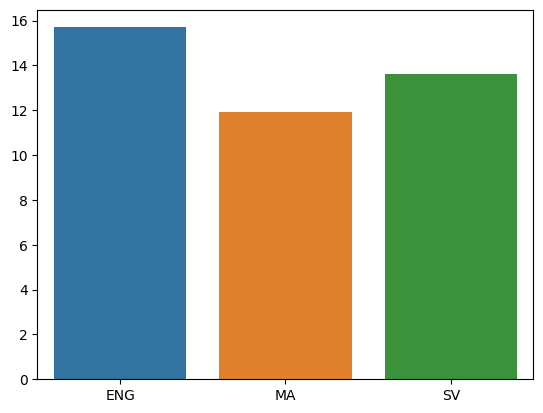

In [93]:
import seaborn as sns

eng_points = df_engelska_cleaned.query("`Huvudman` == 'Samtliga'")["Totalt (poäng)"]
ma_points = df_matematik_cleaned.query("`Huvudman` == 'Samtliga'")["Totalt (poäng)"]
sv_points = df_svenska_cleaned.query("`Huvudman` == 'Samtliga'")["Totalt (poäng)"]
data_frame = {
    "ENG": eng_points, 
    "MA": ma_points, 
    "SV": sv_points
}
graf = sns.barplot(data_frame)
graf